# Import Modules

In [318]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import neural_network, ensemble, svm, preprocessing, model_selection, metrics, pipeline
from imblearn import over_sampling
import smogn

# Import Data

In [319]:
df = pd.read_csv('../assets/data/2019-UT-ASD-Full/2019-UT-ASD-scrapped.csv')

In [320]:
df.head()

,Unnamed: 0,Date,RideId,TrainId,DepartureStation,DepartureTime,DepartureDelay,DestinationStation,ArrivalTime,ArrivalDelay,DeparturePlatform,ArrivalPlatform,DepartureMaterials,ArrivalMaterials,InbetweenStations,FaultMessages,RideInstance,PlannedDepartureTime,PlannedArrivalTime,ActualArrivalTime,ActualDepartureTime,WeatherKey,DepartureWeatherStationCode,DepartureTimestamp,DepartureHour,DepartureWindDir,DepartureWindHour,DepartureWindSpeed,DepartureMaxWindSpeed,DepartureTemperature,DepartureMinTemp10M,DepartureDewPointTemp,DepartureSunshineDur,DepartureRadiation,DeparturePrecipDur,DeparturePrecipHour,DepartureAirPressure,DepartureVisibility,DepartureCloudiness,DepartureHumidity,DepartureWeatherCode,DepartureWeatherCodeIndicator,DepartureFog,DepartureRain,DepartureSnow,DepartureThunder,DepartureIceFormation,DestinationWeatherStationCode,DestinationTimestamp,DestinationHour,DestinationWindDir,DestinationWindHour,DestinationWindSpeed,DestinationMaxWindSpeed,DestinationTemperature,DestinationMinTemp10M,DestinationDewPointTemp,DestinationSunshineDur,DestinationRadiation,DestinationPrecipDur,DestinationPrecipHour,DestinationAirPressure,DestinationVisibility,DestinationCloudiness,DestinationHumidity,DestinationWeatherCode,DestinationWeatherCodeIndicator,DestinationFog,DestinationRain,DestinationSnow,DestinationThunder,DestinationIceFormation,DisruptionKey,rdt_id,ns_lines,rdt_lines,rdt_lines_id,rdt_station_names,rdt_station_codes,cause_nl,cause_en,statistical_cause_nl,statistical_cause_en,cause_group,start_time,end_time,duration_minutes
0,0,2018-12-31,1405,1405,Utrecht Centraal,01:01,1.0,Amsterdam Centraal,01:29,1.5,7,2a,VIRM-4 9516;VIRM-6 8671,VIRM-4 9516;VIRM-6 8671,Amsterdam Bijlmer ArenA,NaN,2018-12-31#1405,2018-12-31 01:01:00,2018-12-31 01:29:00,2018-12-31 01:30:30,2018-12-31 01:02:00,2018-12-31-2-240,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2018-12-31,1402,1402,Amsterdam Centraal,01:18,0.0,Utrecht Centraal,01:53,0.0,2,15,VIRM-6 8730;VIRM-6 8656,NaN,Amsterdam Bijlmer ArenA,NaN,2018-12-31#1402,2018-12-31 01:18:00,2018-12-31 01:53:00,2018-12-31 01:53:00,2018-12-31 01:18:00,2018-12-31-2-260,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2019-01-01,1409,1409,Utrecht Centraal,02:17,0.0,Amsterdam Centraal,02:44,1.0,15,2a,VIRM-6 8656;VIRM-6 8730,VIRM-6 8656;VIRM-6 8730,Amsterdam Bijlmer ArenA,NaN,2019-01-01#1409,2019-01-01 02:17:00,2019-01-01 02:44:00,2019-01-01 02:45:00,2019-01-01 02:17:00,2019-01-01-3-240,260.0,2019-01-01,3.0,250.0,4.0,4.0,9.0,8.4,NaN,5.7,0.0,0.0,0.0,0.0,1030.1,57.0,8.0,83.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,240.0,2019-01-01,3.0,250.0,7.0,7.0,11.0,8.5,NaN,5.1,0.0,0.0,0.0,0.0,1029.5,75.0,8.0,79.0,NaN,5.0,0.0,0.0,0.0,0.0,0.0,2019-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,2018-12-31,1406,1406,Amsterdam Centraal,02:19,1.5,Utrecht Centraal,02:45,0.0,2b,14,VIRM-6 8648;VIRM-4 9504,NaN,NaN,NaN,2018-12-31#1406,2018-12-31 02:19:00,2018-12-31 02:45:00,2018-12-31 02:45:00,2018-12-31 02:20:30,2018-12-31-3-260,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,2019-01-01,1413,1413,Utrecht Centraal,03:11,0.0,Amsterdam Centraal,03:44,0.0,14,2a,VIRM-4 9504;VIRM-6 8648,VIRM-4 9504;VIRM-6 8648,NaN,NaN,2019-01-01#1413,2019-01-01 03:11:00,2019-01-01 03:44:00,2019-01-01 03:44:00,2019-01-01 03:11:00,2019-01-01-4-240,260.0,2019-01-01,4.0,250.0,4.0,4.0,8.0,8.2,NaN,5

In [321]:
df.shape

(111268, 87)

In [322]:
df.columns

Index(['Unnamed: 0', 'Date', 'RideId', 'TrainId', 'DepartureStation',
       'DepartureTime', 'DepartureDelay', 'DestinationStation', 'ArrivalTime',
       'ArrivalDelay', 'DeparturePlatform', 'ArrivalPlatform',
       'DepartureMaterials', 'ArrivalMaterials', 'InbetweenStations',
       'FaultMessages', 'RideInstance', 'PlannedDepartureTime',
       'PlannedArrivalTime', 'ActualArrivalTime', 'ActualDepartureTime',
       'WeatherKey', 'DepartureWeatherStationCode', 'DepartureTimestamp',
       'DepartureHour', 'DepartureWindDir', 'DepartureWindHour',
       'DepartureWindSpeed', 'DepartureMaxWindSpeed', 'DepartureTemperature',
       'DepartureMinTemp10M', 'DepartureDewPointTemp', 'DepartureSunshineDur',
       'DepartureRadiation', 'DeparturePrecipDur', 'DeparturePrecipHour',
       'DepartureAirPressure', 'DepartureVisibility', 'DepartureCloudiness',
       'DepartureHumidity', 'DepartureWeatherCode',
       'DepartureWeatherCodeIndicator', 'DepartureFog', 'DepartureRain',
       'D

In [323]:
df.sort_values('RideInstance', inplace=True)
df.drop_duplicates(subset='RideInstance', keep='last', inplace=True)

In [324]:
df.shape

(93104, 87)

# Feature Enigeering

In [325]:
# these are the features that will be used in the modelling part
features1 = ['RideId', 'TrainId', 'DepartureStation', 'DestinationStation', 
                   'ArrivalTime', 'ArrivalDelay', 'DepartureTime', 'DepartureWindSpeed', 
                   'DepartureVisibility', 'DepartureFog', 'DepartureRain', 'DepartureSnow', 
                   'DepartureThunder', 'DepartureIceFormation', 

                   'DestinationWindSpeed', 'DestinationVisibility', 'DestinationFog', 'DestinationRain',
                   'DestinationSnow', 'DestinationThunder', 'DestinationIceFormation', 'cause_group']

In [140]:
features2 = [
    'DepartureHour', 'DepartureRadiation', 'DestinationRadiation',
    'DepartureWindHour', 'DestinationHumidity', 'DepartureWindSpeed',
    'DepartureVisibility',  'DepartureMaxWindSpeed',  'DestinationVisibility', 
    'DestinationAirPressure', 'ArrivalDelay'
]

In [326]:
feature_df = df[features1]

In [327]:
feature_df.dtypes

RideId                       int64
TrainId                      int64
DepartureStation            object
DestinationStation          object
ArrivalTime                 object
ArrivalDelay               float64
DepartureTime               object
DepartureWindSpeed         float64
DepartureVisibility        float64
DepartureFog               float64
DepartureRain              float64
DepartureSnow              float64
DepartureThunder           float64
DepartureIceFormation      float64
DestinationWindSpeed       float64
DestinationVisibility      float64
DestinationFog             float64
DestinationRain            float64
DestinationSnow            float64
DestinationThunder         float64
DestinationIceFormation    float64
cause_group                 object
dtype: object

In [249]:
feature_df.dropna(inplace=True)

<ipython-input-249-2a7612a683b6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feature_df.dropna(inplace=True)


In [250]:
feature_df.head()

,RideId,TrainId,DepartureStation,DestinationStation,ArrivalTime,ArrivalDelay,DepartureTime,DepartureWindSpeed,DepartureVisibility,DepartureFog,DepartureRain,DepartureSnow,DepartureThunder,DepartureIceFormation,DestinationWindSpeed,DestinationVisibility,DestinationFog,DestinationRain,DestinationSnow,DestinationThunder,DestinationIceFormation,cause_group
2229,104,104,Utrecht Centraal,Amsterdam Centraal,21:58,0.0,21:33,5.0,59.0,0.0,1.0,0.0,0.0,0.0,10.0,66.0,0.0,0.0,0.0,0.0,0.0,external
1810,105,105,Amsterdam Centraal,Utrecht Centraal,08:33,1.0,08:08,13.0,58.0,0.0,1.0,0.0,0.0,0.0,8.0,62.0,0.0,1.0,0.0,0.0,0.0,rolling stock
2255,120,120,Utrecht Centraal,Amsterdam Centraal,23:28,0.0,23:03,4.0,70.0,0.0,1.0,0.0,0.0,0.0,13.0,59.0,0.0,1.0,0.0,0.0,0.0,external
1762,121,121,Amsterdam Centraal,Utrecht Centraal,07:03,0.0,06:38,16.0,57.0,0.0,1.0,0.0,0.0,0.0,7.0,60.0,0.0,1.0,0.0,0.0,0.0,rolling stock
2203,122,122,Utrecht Centraal,Amsterdam Centraal,20:28,0.0,20:03,5.0,67.0,0.0,1.0,0.0,0.0,0.0,11.0,66.0,0.0,1.0,0.0,0.0,0.0,external


In [251]:
feature_df['DepartureHour'] = feature_df['DepartureHour'].astype(int)

KeyError: 'DepartureHour'

In [149]:
to_scale = [col for col in feature_df.columns if feature_df[col].max() > 1]

In [150]:
to_scale.remove('ArrivalDelay')

In [151]:
to_scale

['DepartureHour',
 'DepartureRadiation',
 'DestinationRadiation',
 'DepartureWindHour',
 'DestinationHumidity',
 'DepartureWindSpeed',
 'DepartureVisibility',
 'DepartureMaxWindSpeed',
 'DestinationVisibility',
 'DestinationAirPressure']

In [152]:
mms = preprocessing.MinMaxScaler()
feature_df[to_scale] = mms.fit_transform(feature_df[to_scale])

<ipython-input-152-26812148682b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feature_df[to_scale] = mms.fit_transform(feature_df[to_scale])
C:\Users\micha\anaconda3\lib\site-packages\pandas\core\indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


In [172]:
feature_df.isna().sum()

RideId                         0
TrainId                        0
DepartureStation             794
DestinationStation           919
ArrivalTime                  919
ArrivalDelay                   0
DepartureTime                801
DepartureWindSpeed           924
DepartureVisibility          924
DepartureFog                 924
DepartureRain                924
DepartureSnow                924
DepartureThunder             924
DepartureIceFormation        924
DestinationWindSpeed         922
DestinationVisibility        922
DestinationFog               922
DestinationRain              922
DestinationSnow              922
DestinationThunder           922
DestinationIceFormation      922
cause_group                61629
dtype: int64

In [328]:
feature_df['DepartureTime'] = pd.to_datetime(feature_df['DepartureTime']).dt.hour
feature_df['ArrivalTime'] = pd.to_datetime(feature_df['ArrivalTime']).dt.hour

<ipython-input-328-f6988f8061be>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feature_df['DepartureTime'] = pd.to_datetime(feature_df['DepartureTime']).dt.hour
<ipython-input-328-f6988f8061be>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feature_df['ArrivalTime'] = pd.to_datetime(feature_df['ArrivalTime']).dt.hour


In [329]:
# def apply_delay_category(delay):
#     if delay < 1:
#         return 'No Delay'
#     if delay < 5:
#         return '<5'
#     if delay < 10:
#         return '<10'
#     if delay < 15:
#         return '<15'
#     return '>15'

In [330]:
# feature_df['DelayCategory'] = feature_df['ArrivalDelay'].apply(lambda delay: apply_delay_category(delay))

In [331]:
# feature_df['DelayCategory'].unique()

> Encode the labels

In [332]:
encoder = preprocessing.LabelEncoder()

In [333]:
feature_df['DepartureStation'].unique()

array(['Amsterdam Centraal', 'Utrecht Centraal', nan], dtype=object)

In [334]:
feature_df['DestinationStation'].unique()

array(['Utrecht Centraal', 'Amsterdam Centraal', nan], dtype=object)

In [335]:
feature_df['DepartureStation'] = encoder.fit_transform(feature_df['DepartureStation'])
feature_df['DestinationStation'] = encoder.fit_transform(feature_df['DestinationStation'])

<ipython-input-335-7937afe1ee27>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feature_df['DepartureStation'] = encoder.fit_transform(feature_df['DepartureStation'])
<ipython-input-335-7937afe1ee27>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feature_df['DestinationStation'] = encoder.fit_transform(feature_df['DestinationStation'])


In [336]:
feature_df['DepartureStation'].unique()

array([0, 1, 2])

In [337]:
feature_df['DestinationStation'].unique()

array([1, 0, 2])

In [338]:
# add if a disruption is related to maintenance
feature_df['Maintanence'] = feature_df['cause_group'].apply(lambda cause: True if cause == 'engineering work' else False)

<ipython-input-338-71f58dfe29fd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feature_df['Maintanence'] = feature_df['cause_group'].apply(lambda cause: True if cause == 'engineering work' else False)


In [339]:
feature_df.drop(columns=['cause_group'], inplace=True)

C:\Users\micha\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [340]:
feature_df.dropna(inplace=True)

<ipython-input-340-2a7612a683b6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feature_df.dropna(inplace=True)


In [341]:
feature_df.shape

(92180, 22)

In [342]:
feature_df.isna().sum()

RideId                     0
TrainId                    0
DepartureStation           0
DestinationStation         0
ArrivalTime                0
ArrivalDelay               0
DepartureTime              0
DepartureWindSpeed         0
DepartureVisibility        0
DepartureFog               0
DepartureRain              0
DepartureSnow              0
DepartureThunder           0
DepartureIceFormation      0
DestinationWindSpeed       0
DestinationVisibility      0
DestinationFog             0
DestinationRain            0
DestinationSnow            0
DestinationThunder         0
DestinationIceFormation    0
Maintanence                0
dtype: int64

# Data Scaling

In [184]:
feature_df.columns

Index(['RideId', 'TrainId', 'DepartureStation', 'DestinationStation',
       'ArrivalTime', 'ArrivalDelay', 'DepartureTime', 'DepartureWindSpeed',
       'DepartureVisibility', 'DepartureFog', 'DepartureRain', 'DepartureSnow',
       'DepartureThunder', 'DepartureIceFormation', 'DestinationWindSpeed',
       'DestinationVisibility', 'DestinationFog', 'DestinationRain',
       'DestinationSnow', 'DestinationThunder', 'DestinationIceFormation',
       'Maintanence'],
      dtype='object')

In [185]:
to_scale = [col for col in feature_df.columns if feature_df[col].max() > 1]

In [186]:
to_scale.remove('ArrivalDelay')

In [187]:
to_scale

['RideId',
 'TrainId',
 'ArrivalTime',
 'DepartureTime',
 'DepartureWindSpeed',
 'DepartureVisibility',
 'DestinationWindSpeed',
 'DestinationVisibility']

In [188]:
mms = preprocessing.MinMaxScaler()
feature_df[to_scale] = mms.fit_transform(feature_df[to_scale])

<ipython-input-188-26812148682b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feature_df[to_scale] = mms.fit_transform(feature_df[to_scale])
C:\Users\micha\anaconda3\lib\site-packages\pandas\core\indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


In [189]:
feature_df.head()

,RideId,TrainId,DepartureStation,DestinationStation,ArrivalTime,ArrivalDelay,DepartureTime,DepartureWindSpeed,DepartureVisibility,DepartureFog,DepartureRain,DepartureSnow,DepartureThunder,DepartureIceFormation,DestinationWindSpeed,DestinationVisibility,DestinationFog,DestinationRain,DestinationSnow,DestinationThunder,DestinationIceFormation,Maintanence
177,0.000000,0.000000,1,0,0.913043,15.0,0.913043,0.222222,0.831325,0.0,0.0,0.0,0.0,0.0,0.388889,0.771084,0.0,1.0,0.0,0.0,0.0,False
190,0.000023,0.000023,1,0,1.000000,0.0,1.000000,0.277778,0.783133,0.0,1.0,0.0,0.0,0.0,0.388889,0.843373,0.0,1.0,0.0,0.0,0.0,False
160,0.000026,0.000026,1,0,0.869565,0.0,0.869565,0.277778,0.831325,0.0,0.0,0.0,0.0,0.0,0.444444,0.867470,0.0,0.0,0.0,0.0,0.0,False
38,0.000027,0.000027,0,1,0.478261,2.0,0.434783,0.333333,0.771084,0.0,1.0,0.0,0.0,0.0,0.222222,0.795181,0.0,0.0,0.0,0.0,0.0,False
122,0.000028,0.000028,1,0,0.739130,17.0,0.739130,0.333333,0.831325,0.0,1.0,0.0,0.0,0.0,0.333333,0.807229,0.0,1.0,0.0,0.0,0.0,False


# Splitting Test & Training

In [343]:
y = feature_df.pop('ArrivalDelay')
X = feature_df

In [344]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, random_state=42)

# SMOTE 
> Synthetic Minority Oversampling Technique

In [345]:
X_train.head()

,RideId,TrainId,DepartureStation,DestinationStation,ArrivalTime,DepartureTime,DepartureWindSpeed,DepartureVisibility,DepartureFog,DepartureRain,DepartureSnow,DepartureThunder,DepartureIceFormation,DestinationWindSpeed,DestinationVisibility,DestinationFog,DestinationRain,DestinationSnow,DestinationThunder,DestinationIceFormation,Maintanence
95712,3085,3085,0,1,23.0,22.0,10.0,57.0,0.0,1.0,0.0,0.0,0.0,5.0,69.0,0.0,1.0,0.0,0.0,0.0,False
39440,3062,3062,1,0,19.0,18.0,2.0,83.0,0.0,0.0,0.0,0.0,0.0,6.0,83.0,0.0,0.0,0.0,0.0,0.0,False
66041,3044,3044,1,0,14.0,14.0,3.0,81.0,0.0,0.0,0.0,0.0,0.0,7.0,80.0,0.0,0.0,0.0,0.0,0.0,False
4353,3085,3085,0,1,23.0,22.0,8.0,70.0,0.0,0.0,0.0,0.0,0.0,6.0,70.0,0.0,0.0,0.0,0.0,0.0,False
14256,3072,3072,1,0,21.0,21.0,1.0,50.0,0.0,0.0,0.0,0.0,0.0,3.0,50.0,0.0,0.0,0.0,0.0,0.0,False


In [346]:
train_data = X_train.join(y_train)

In [347]:
train_data

,RideId,TrainId,DepartureStation,DestinationStation,ArrivalTime,DepartureTime,DepartureWindSpeed,DepartureVisibility,DepartureFog,DepartureRain,DepartureSnow,DepartureThunder,DepartureIceFormation,DestinationWindSpeed,DestinationVisibility,DestinationFog,DestinationRain,DestinationSnow,DestinationThunder,DestinationIceFormation,Maintanence,ArrivalDelay
95712,3085,3085,0,1,23.0,22.0,10.0,57.0,0.0,1.0,0.0,0.0,0.0,5.0,69.0,0.0,1.0,0.0,0.0,0.0,False,0.0
39440,3062,3062,1,0,19.0,18.0,2.0,83.0,0.0,0.0,0.0,0.0,0.0,6.0,83.0,0.0,0.0,0.0,0.0,0.0,False,1.0
66041,3044,3044,1,0,14.0,14.0,3.0,81.0,0.0,0.0,0.0,0.0,0.0,7.0,80.0,0.0,0.0,0.0,0.0,0.0,False,0.0
4353,3085,3085,0,1,23.0,22.0,8.0,70.0,0.0,0.0,0.0,0.0,0.0,6.0,70.0,0.0,0.0,0.0,0.0,0.0,False,5.5
14256,3072,3072,1,0,21.0,21.0,1.0,50.0,0.0,0.0,0.0,0.0,0.0,3.0,50.0,0.0,0.0,0.0,0.0,0.0,False,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6875,3025,3025,0,1,8.0,7.0,4.0,7.0,1.0,0.0,0.0,0.0,1.0,2.0,6.0,1.0,0.0,0.0,0.0,1.0,False,0.0
66262,832,300832,1,0,11.0,10.0,4.0,82.0,0.0,0.0,0.0,0.0,0.0,6.0,76.0,0.0,0.0,0.0,0.0,0.0,False,0.0
92413,3075,3075,0,1,20.0,20.0,5.0,41.0,0.0,1.0,0.0,0.0,0.0,4.0,56.0,0.0,1.0,0.0,0.0,0.0,False,0.0
1006,3072,3072,1,0,21.0,21.0,3.0,57.0,0.0,0.0,0.0,0.0,0.0,4.0,70.0,0.0,0.0,0.0,0.0,0.0,False,0.0


In [201]:
smogn_data = smogn.smoter(
    data=train_data,
    y='ArrivalDelay'
)

C:\Users\micha\anaconda3\lib\site-packages\smogn\phi.py:81: RuntimeWarning: divide by zero encountered in double_scalars
  delta.append((y_rel[i + 1] - y_rel[i]) / h[i])


ValueError: redefine phi relevance function: all points are 0

In [134]:
y_train = y_train.round()
y_test = y_test.round()

In [75]:
pd.set_option('display.max_columns', None)
feature_df.head()

,RideId,TrainId,DepartureStation,DestinationStation,ArrivalTime,DepartureTime,DepartureWindSpeed,DepartureVisibility,DepartureFog,DepartureRain,DepartureSnow,DepartureThunder,DepartureIceFormation,DestinationWindSpeed,DestinationVisibility,DestinationFog,DestinationRain,DestinationSnow,DestinationThunder,DestinationIceFormation,Maintanence
177,0.000000,0.000000,1,0,0.913043,0.913043,0.222222,0.831325,0.0,0.0,0.0,0.0,0.0,0.388889,0.771084,0.0,1.0,0.0,0.0,0.0,False
190,0.000023,0.000023,1,0,1.000000,1.000000,0.277778,0.783133,0.0,1.0,0.0,0.0,0.0,0.388889,0.843373,0.0,1.0,0.0,0.0,0.0,False
160,0.000026,0.000026,1,0,0.869565,0.869565,0.277778,0.831325,0.0,0.0,0.0,0.0,0.0,0.444444,0.867470,0.0,0.0,0.0,0.0,0.0,False
38,0.000027,0.000027,0,1,0.478261,0.434783,0.333333,0.771084,0.0,1.0,0.0,0.0,0.0,0.222222,0.795181,0.0,0.0,0.0,0.0,0.0,False
122,0.000028,0.000028,1,0,0.739130,0.739130,0.333333,0.831325,0.0,1.0,0.0,0.0,0.0,0.333333,0.807229,0.0,1.0,0.0,0.0,0.0,False


In [76]:
feature_df.shape

(92180, 21)

In [202]:
smote = over_sampling.RandomOverSampler(
#                 categorical_features=[0, 1, 2, 3, 7, 8, 9, 10, 11, 12, 14, 15, 16, 17, 18, 19, 20], 
                sampling_strategy='auto',
                random_state=42
               )

X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

ValueError: Unknown label type: 'continuous'

In [ ]:
y_train_smote.value_counts(normalize=True)

# Modelling

In [77]:
# parameters to be tuned in grid search cv
parameters = dict(
    hidden_layer_sizes=[(128, 64), (256, 128, 64), (256, 128, 64, 32), (128, 64, 32)],
    activation=['identity', 'logistic', 'tanh', 'relu'],
    solver=['lbfgs', 'sgd', 'adam'],
    learning_rate=['constant', 'invscaling', 'adaptive']
)

In [348]:
mlp = neural_network.MLPRegressor(
    hidden_layer_sizes=(128, 64, 32), 
    activation='tanh', 
    solver='adam',
    learning_rate='constant',
    random_state=42
)

In [349]:
mlp.fit(X_train, y_train)

MLPRegressor(activation='tanh', hidden_layer_sizes=(128, 64, 32),
             random_state=42)

In [350]:
y_pred = mlp.predict(X_test)

In [351]:
y_true_pred = pd.DataFrame({
    'y_true': y_test,
    'y_pred': y_pred,
})

<AxesSubplot:ylabel='Frequency'>

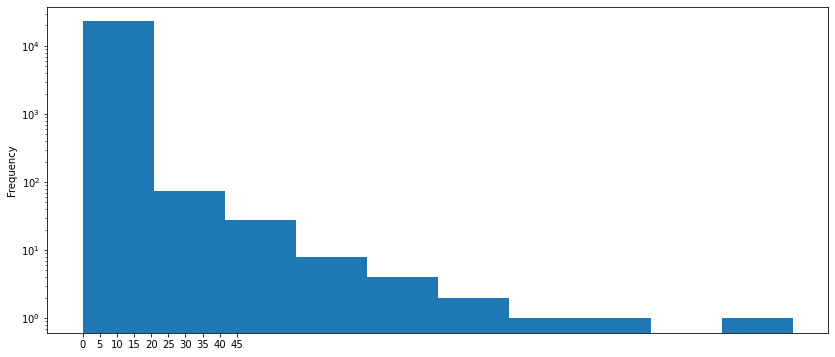

In [352]:
y_true_pred['y_true'].plot(kind='hist', figsize=(14, 6), bins=10, logy=True, xticks=range(0, 50, 5)) 

<AxesSubplot:ylabel='Frequency'>

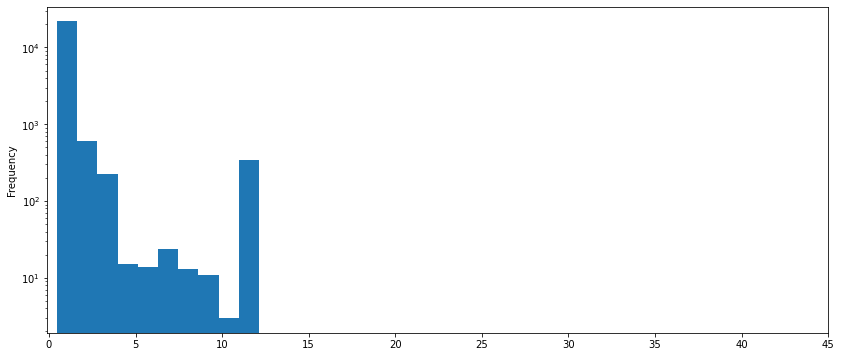

In [353]:
y_true_pred['y_pred'].plot(kind='hist', figsize=(14, 6), bins=10, logy=True, xticks=range(0, 50, 5))

In [227]:
def confidence_checker(row):
    conf = 2 * 1.4
    if row['y_true'] <= conf + row['y_pred'] and row['y_true'] >= row['y_pred'] - conf:
        return True
    return False

In [228]:
y_true_pred.apply(confidence_checker, axis=1).value_counts(normalize=True)

True     0.936559
False    0.063441
dtype: float64

In [ ]:
import pickle
pickle.dump(clf, open(f'{params["to"]}model.pickle', mode='wb'))

In [300]:
pipe = pipeline.Pipeline(
    steps=[
        ("scale", preprocessing.MinMaxScaler()),
        ("model", neural_network.MLPRegressor(
                    hidden_layer_sizes=(128, 64, 32), 
                    activation='tanh', 
                    solver='adam',
                    learning_rate='constant',
                    random_state=42
                )
        ),
    ]
)

In [301]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('scale', MinMaxScaler()),
                ('model',
                 MLPRegressor(activation='tanh',
                              hidden_layer_sizes=(128, 64, 32),
                              random_state=42))])

In [303]:
y_pred = pipe.predict(X_test)

In [304]:
y_true_pred = pd.DataFrame({
    'y_true': y_test,
    'y_pred': y_pred,
})

In [354]:
np.mean(abs(y_true_pred['y_true'] - y_true_pred['y_pred']))

1.3090029121820441

In [310]:
X_train.columns

Index(['RideId', 'TrainId', 'DepartureStation', 'DestinationStation',
       'ArrivalTime', 'DepartureTime', 'DepartureWindSpeed',
       'DepartureVisibility', 'DepartureFog', 'DepartureRain', 'DepartureSnow',
       'DepartureThunder', 'DepartureIceFormation', 'DestinationWindSpeed',
       'DestinationVisibility', 'DestinationFog', 'DestinationRain',
       'DestinationSnow', 'DestinationThunder', 'DestinationIceFormation',
       'Maintanence'],
      dtype='object')

In [307]:
y_true_pred['y_true']

13130    4.5
44836    0.0
53342    0.0
18391    1.0
21512    0.0
        ... 
69864    0.0
70209    0.0
11238    3.5
16147    0.0
92463    0.0
Name: y_true, Length: 23045, dtype: float64

In [311]:
import pickle
pickle.dump(pipe, open(f'../assets/models/MLPRegressor.pickle', mode='wb'))

In [317]:
# Convert into ONNX format
from skl2onnx import convert_sklearn
from skl2onnx.common.data_types import FloatTensorType, BooleanTensorType, Int64TensorType
# initial_type = [('float_input', FloatTensorType([None, 21]))
initial_type = [
    ('float_input', FloatTensorType([None, 18])),
    ('int_input', Int64TensorType([None, 3])),
#     ('bool_input', BooleanTensorType([None, 1]))
]
onx = convert_sklearn(pipe, initial_types=initial_type)
with open("../assets/models/MLPRegressor.onnx", "wb") as f:
    f.write(onx.SerializeToString())

RuntimeError: Operator 'Scaler' is not white listed.

In [79]:
clf = model_selection.GridSearchCV(estimator=mlp, param_grid=parameters, n_jobs=4, verbose=1)

In [80]:
%%time
clf.fit(X_train, y_train)

Fitting 5 folds for each of 144 candidates, totalling 720 fits
Wall time: 7h 36min 2s


GridSearchCV(estimator=MLPRegressor(random_state=42), n_jobs=4,
             param_grid={'activation': ['identity', 'logistic', 'tanh', 'relu'],
                         'hidden_layer_sizes': [(128, 64), (256, 128, 64),
                                                (256, 128, 64, 32),
                                                (128, 64, 32)],
                         'learning_rate': ['constant', 'invscaling',
                                           'adaptive'],
                         'solver': ['lbfgs', 'sgd', 'adam']},
             verbose=1)

In [83]:
clf.best_params_

{'activation': 'tanh',
 'hidden_layer_sizes': (128, 64, 32),
 'learning_rate': 'constant',
 'solver': 'adam'}

In [84]:
results = pd.DataFrame(clf.cv_results_)

In [85]:
results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_activation,param_hidden_layer_sizes,param_learning_rate,param_solver,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,16.319710,2.371805,0.081894,0.015014,identity,"(128, 64)",constant,lbfgs,"{'activation': 'identity', 'hidden_layer_sizes...",0.006809,0.006897,0.008262,0.005087,0.005967,0.006604,0.001057,100
1,21.623480,7.802804,0.078098,0.006010,identity,"(128, 64)",constant,sgd,"{'activation': 'identity', 'hidden_layer_sizes...",0.006646,0.006860,0.008015,0.004460,0.005712,0.006338,0.001192,111
2,27.995609,8.876627,0.071625,0.009678,identity,"(128, 64)",constant,adam,"{'activation': 'identity', 'hidden_layer_sizes...",0.006471,0.007050,0.007682,0.004897,0.005853,0.006391,0.000962,108
3,15.093507,1.954848,0.069473,0.004906,identity,"(128, 64)",invscaling,lbfgs,"{'activation': 'identity', 'hidden_layer_sizes...",0.006809,0.006897,0.008262,0.005087,0.005967,0.006604,0.001057,100
4,20.740912,4.861806,0.069715,0.012618,identity,"(128, 64)",invscaling,sgd,"{'activation': 'identity', 'hidden_layer_sizes...",0.005242,0.007192,0.008218,0.004941,0.004889,0.006097,0.001358,119


# Evaluation

In [86]:
clf.best_estimator_.score(X_test, y_test)

0.07549065620033246

In [88]:
y_pred = clf.best_estimator_.predict(X_test)

In [89]:
metrics.mean_squared_error(y_test, y_pred, squared=False)

4.00503012902808

In [90]:
y_true_pred = pd.DataFrame({
    'y_true': y_test,
    'y_pred': y_pred
})

In [222]:
np.mean(abs(y_true_pred['y_true'] - y_true_pred['y_pred']))

1.4398857400746239

# SVR

In [108]:
parameters = dict(
    kernel=['linear', 'poly', 'rbf', 'sigmoid'],
    degree=[1, 2, 3, 4, 5],
    gamma=['scale', 'auto'],
    C=[1, 2, 3, 4, 5]
)

In [109]:
svr = svm.SVR(verbose=1)

In [110]:
clf = model_selection.GridSearchCV(estimator=svr, param_grid=parameters, verbose=1, n_jobs=4)

In [105]:
clf.fit(X_train, y_train)

Fitting 5 folds for each of 250 candidates, totalling 1250 fits


ValueError: X should be a square kernel matrix

In [107]:
clf.cv_results_

AttributeError: 'GridSearchCV' object has no attribute 'cv_results_'

In [140]:
params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [10, 20, 50, 200, None],
    'max_features': ['auto', 'sqrt', 'log2'],
}

In [141]:
rfc = ensemble.RandomForestClassifier(n_jobs=4, random_state=42)

In [143]:
clf = model_selection.GridSearchCV(rfc, param_grid=params, n_jobs=4)

In [144]:
clf.fit(X_train_smote, y_train_smote)

C:\Users\micha\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


GridSearchCV(estimator=RandomForestClassifier(n_jobs=4, random_state=42),
             n_jobs=4,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 20, 50, 200, None],
                         'max_features': ['auto', 'sqrt', 'log2']},
             scoring='recall')

In [146]:
clf.best_params_

{'criterion': 'gini', 'max_depth': 10, 'max_features': 'auto'}

[[0.20568562 0.10033445 0.15217391 0.04347826 0.49832776]
 [0.17058824 0.10588235 0.12352941 0.11764706 0.48235294]
 [0.17077176 0.06042693 0.15139573 0.03087028 0.5865353 ]
 [0.0858209  0.04477612 0.05223881 0.59328358 0.2238806 ]
 [0.12460451 0.03216621 0.08189201 0.02831681 0.73302046]]


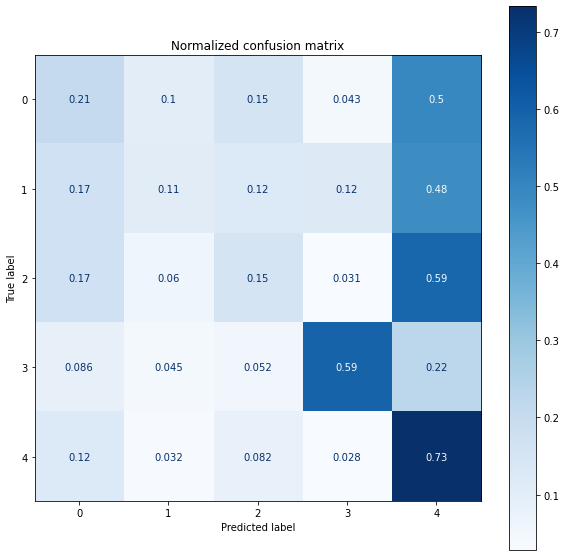

In [145]:
disp = metrics.plot_confusion_matrix(clf.best_estimator_, X_test, y_test,
                              cmap=plt.cm.Blues,
                              normalize='true')
disp.ax_.set_title("Normalized confusion matrix")
disp.figure_.set_size_inches(10, 10)

print(disp.confusion_matrix)

plt.show()

In [147]:
df = pd.DataFrame(clf.cv_results_)

In [148]:
df.sort_values('mean_fit_time', ascending=False)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
22,43.690699,1.580256,2.032400,0.211734,entropy,50,sqrt,"{'criterion': 'entropy', 'max_depth': 50, 'max...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,7
23,42.673097,1.241995,2.046201,0.260185,entropy,50,log2,"{'criterion': 'entropy', 'max_depth': 50, 'max...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,6
25,41.801501,0.967713,1.981200,0.154151,entropy,200,sqrt,"{'criterion': 'entropy', 'max_depth': 200, 'ma...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
24,41.574299,0.421824,2.092301,0.111865,entropy,200,auto,"{'criterion': 'entropy', 'max_depth': 200, 'ma...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
21,41.395233,0.575800,1.934265,0.206457,entropy,50,auto,"{'criterion': 'entropy', 'max_depth': 50, 'max...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,8
27,41.366201,0.416960,1.911899,0.132183,entropy,None,auto,"{'criterion': 'entropy', 'max_depth': None, 'm...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
26,41.280000,0.221344,1.870900,0.137616,entropy,200,log2,"{'criterion': 'entropy', 'max_depth': 200, 'ma...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
28,41.215999,0.463876,1.921202,0.119251,entropy,None,sqrt,"{'criterion': 'entropy', 'max_depth': None, 'm...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,29
18,37.558601,0.590930,1.360801,0.138443,entropy,20,auto,"{'criterion': 'entropy', 'max_depth': 20, 'max...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,11
20,37.169180,0.336344,1.496200,0.137863,entropy,20,log2,"{'criterion': 'entropy', 'max_depth': 20, 'max...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,9
